<a href="https://colab.research.google.com/github/Amanda-Sibanda/agriBORA-Commodity-Price-Forecasting/blob/main/Exploratory_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

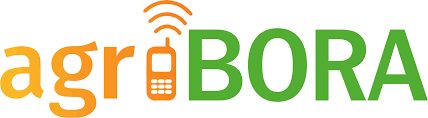

#****agriBORA Commodity Price Forecasting****

Smallholder farmers in Kenya face significant maize price volatility and high post-harvest losses. agriBORA helps farmers store their produce safely and access credit, but effective decision-making still depends on knowing when to sell for the best price.

In this project, we use historical weekly maize prices to build a machine learning model that forecasts average prices for Kiambu, Kirinyaga, Mombasa, Nairobi, and Uasin-Gishu.
The model must predict two weeks ahead at each step, covering the period from November 17, 2025 to January 10, 2026.

Accurate forecasts will support better market timing, improve farmer earnings, and strengthen agriBORA’s market intelligence tools.

In [ ]:
# Import libraries
from matplotlib.colors import LinearSegmentedColormap
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Mount drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Set file path
path = "/content/drive/MyDrive/agribora-commodity-price-forecasting-challenge20251124-1142-1vfhirx/"

In [ ]:
## Set colour palette
agriBORA_colors_list = [
    "#F9A825",  # orange light
    "#FB8C00",  # orange
    "#EF6C00",  # dark orange
    "#7CB342",  # light green
    "#43A047",  # green
    "#2E7D32"   # dark green
]

agriBORA_cmap = LinearSegmentedColormap.from_list(
    "agriBORA_cmap", agriBORA_colors_list
)

#*****Exploratory Data Analysis*****

**Data**

*   First dataset is from ***Kamis***,  the Kenya Agricultural Market Information System. It is a state portal by Kenya's Ministry of Agriculture that provides real-time market data on commodity prices and conditions to farmers and traders.
 It consists of historical prices for white maize from 2021 - 2025/07.
The dataframe has 3345 rows and 15 columns.

*   Second dataset is from ***AgriBBORA***, an agri fintech company that protects grain, unlocks instant financing and links farmers and agriHUBS to reliable markets across East Africa. It consists of transaction data between businesses showing the weekly white maize prices from 2023/10 - 2025/10.
The dataframe has 749 rows and 6 columns.

* Third dataset is the overlapping data between the ***AgriBORA*** and ***Kamis*** datasets. It has 1058 rows and 14 columns.


In [ ]:
# Load data
kamis_df = pd.read_csv(path +'kamis_cleaned_20251221.csv')
agri_df = pd.read_csv(path +'agri_cleaned_20251221.csv')
overlap = pd.read_csv(path+ 'overlap_20251221.csv')

**Quick Overview of Data**

In [ ]:
# Shape of the data
print("Kamis:", kamis_df.shape)
print("Agri:", agri_df.shape)
print("Overlap:", overlap.shape)


Kamis: (3346, 15)
Agri: (749, 6)
Overlap: (1058, 14)


In [ ]:
kamis_df.head(2)

,Commodity_Classification,Commodity,Classification,County,Market,Date,Year,Month,Year_Month,WeekofYear,Year_Week,SupplyVolume,Retail,Wholesale,Unit
0,Dry_White_Maize,Dry_Maize,White_Maize,Kiambu,Wangige_Market,2021-05-24,2021,5,2021-05,21,2021-21,9000.0,40.0,30.00,Kg
1,Dry_White_Maize,Dry_Maize,White_Maize,Kiambu,Limuru_Rongai_Market,2021-05-24,2021,5,2021-05,21,2021-21,7200.0,40.0,28.89,Kg


In [ ]:
agri_df.head(2)

,County,Date,WholeSale,Commodity_Classification,Year_Week,WeekofYear
0,Nairobi,2023-10-03,50.00,Dry_White_Maize,2023-40,40
1,Kirinyaga,2023-10-03,48.89,Dry_White_Maize,2023-40,40


In [ ]:
overlap.head(2)

,County,Date,Agri_WholeSale,Commodity_Classification,Year_Week,Week_of_Year,Market,Year,Month,Year_Month,Supply_Volume,Retail_Price,Kamis_WholeSale,Unit
0,Kirinyaga,2023-10-03,48.89,Dry_White_Maize,2023-40,40,Ngurubani_Market,2023,10,2023-10,6000.0,60.0,44.44,Kg
1,Kirinyaga,2023-10-03,48.89,Dry_White_Maize,2023-40,40,Makutano_Kirinyaga_Market,2023,10,2023-10,4500.0,60.0,40.00,Kg


In [ ]:
# Summary statistics for numeric columns
print(kamis_df.describe())
print(agri_df.describe())

              Year        Month   WeekofYear  SupplyVolume       Retail  \
count  3346.000000  3346.000000  3346.000000   3346.000000  3346.000000   
mean   2022.800956     6.552002    26.757621   7591.559038    65.902746   
std       1.155404     2.961812    12.790814   6929.386091    21.150761   
min    2021.000000     1.000000     1.000000      0.000000     6.390000   
25%    2022.000000     5.000000    19.000000   4000.000000    50.000000   
50%    2023.000000     7.000000    27.000000   6000.000000    65.000000   
75%    2024.000000     9.000000    36.000000   9866.904389    80.000000   
max    2025.000000    12.000000    52.000000  90000.000000   180.000000   

         Wholesale  
count  3346.000000  
mean     51.417956  
std      16.628679  
min      15.000000  
25%      37.500000  
50%      50.000000  
75%      65.000000  
max     118.000000  
        WholeSale  WeekofYear
count  749.000000  749.000000
mean    41.688619   23.328438
std      4.989127   14.246643
min     25.8800

**Prices Over Time**

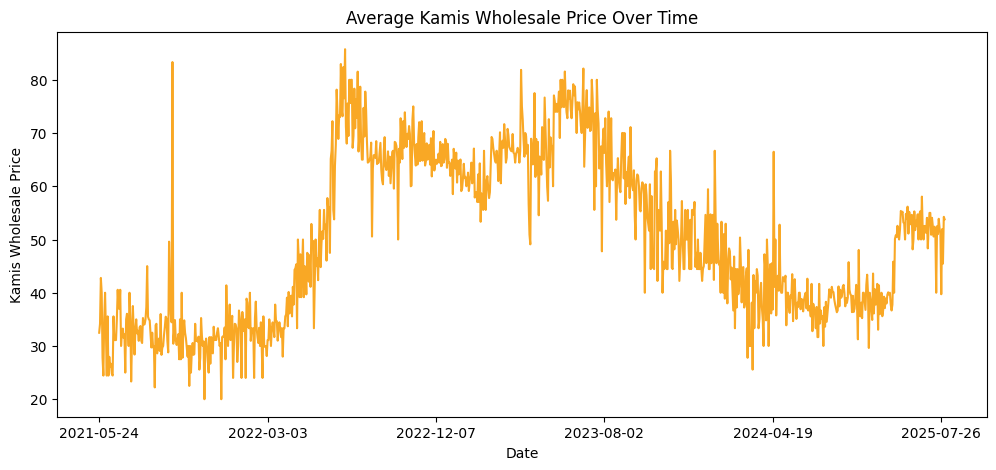

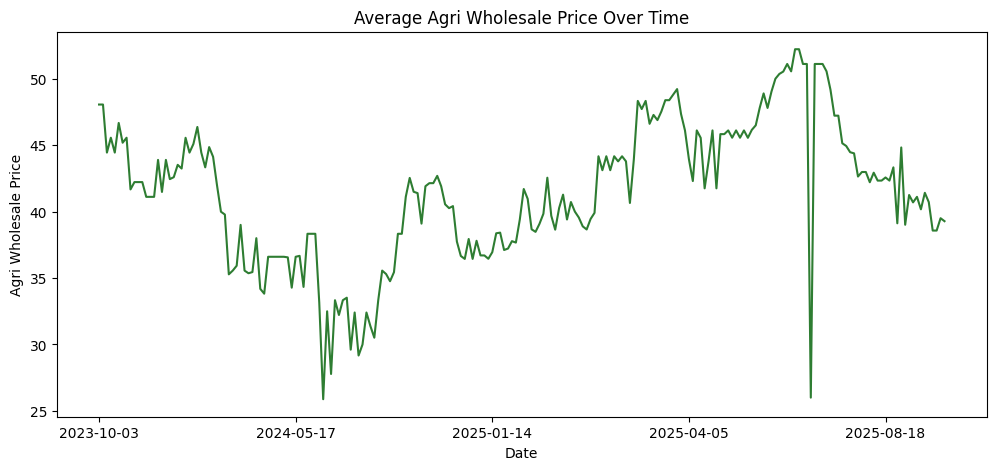

In [ ]:
# Kamis
kamis_df.groupby('Date')['Wholesale'].mean().plot(figsize=(12,5), title='Average Kamis Wholesale Price Over Time', color=agriBORA_colors_list[0])
plt.ylabel('Kamis Wholesale Price')
plt.show()

# Agri
agri_df.groupby('Date')['WholeSale'].mean().plot(figsize=(12,5), title='Average Agri Wholesale Price Over Time', color=agriBORA_colors_list[5])
plt.ylabel('Agri Wholesale Price')
plt.show()

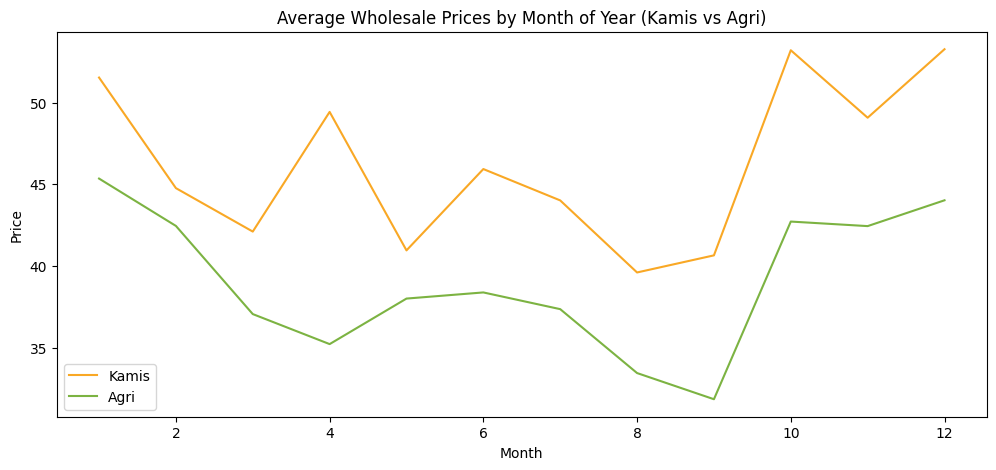

In [ ]:
overlap_avg_kamis = overlap.groupby('Month')['Kamis_WholeSale'].mean()
overlap_avg_agri = overlap.groupby('Month')['Agri_WholeSale'].mean()

# Plot Kamis vs Agri (overlap)
plt.figure(figsize=(12,5))
plt.plot(overlap_avg_kamis.index, overlap_avg_kamis.values, color=agriBORA_colors_list[0], label='Kamis')
plt.plot(overlap_avg_agri.index, overlap_avg_agri.values, color=agriBORA_colors_list[3], label='Agri')
plt.title('Average Wholesale Prices by Month of Year (Kamis vs Agri)')
plt.ylabel('Price')
plt.xlabel('Month')
plt.legend()
plt.show()


Although Kamis prices align with Agri prices during certain periods, this relationship is inconsistent across months. As a result, relying solely on the Kamis dataset to predict Agribora maize prices under a linearity assumption would not be appropriate.

**Distribution of Prices**

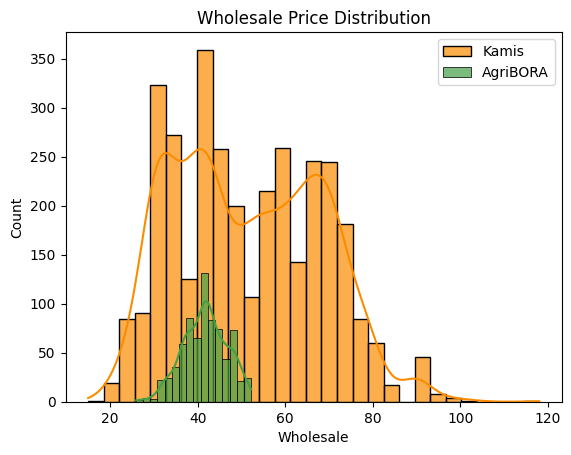

In [ ]:
# Kamis vs Agri Wholesale price distribution
sns.histplot(kamis_df['Wholesale'], kde=True, color=agriBORA_colors_list[1], label='Kamis', alpha=0.7)
sns.histplot(agri_df['WholeSale'], kde=True, color=agriBORA_colors_list[4], label='AgriBORA', alpha=0.7)
plt.legend()
plt.title('Wholesale Price Distribution')
plt.show()

The Agribora dataset follows an approximate normal distribution whilst the Kamis dataset does not.

**Price Spread in Overlap**

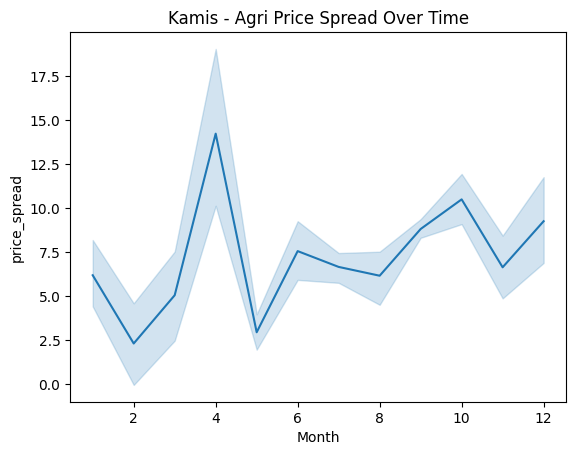

In [ ]:
overlap['price_spread'] = overlap['Kamis_WholeSale'] - overlap['Agri_WholeSale']
sns.lineplot(data=overlap, x='Month', y='price_spread')
plt.title('Kamis - Agri Price Spread Over Time')
plt.show()


While the average price difference between Kamis and Agri is around 7 in most months, notable deviations occur. In April, the spread increases substantially to nearly 15, whereas in February it narrows considerably to approximately 2.5, indicating instability in the price relationship.

**Market/ County Comparison**

/tmp/ipython-input-428561419.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipython-input-428561419.py:2: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  sns.boxplot(


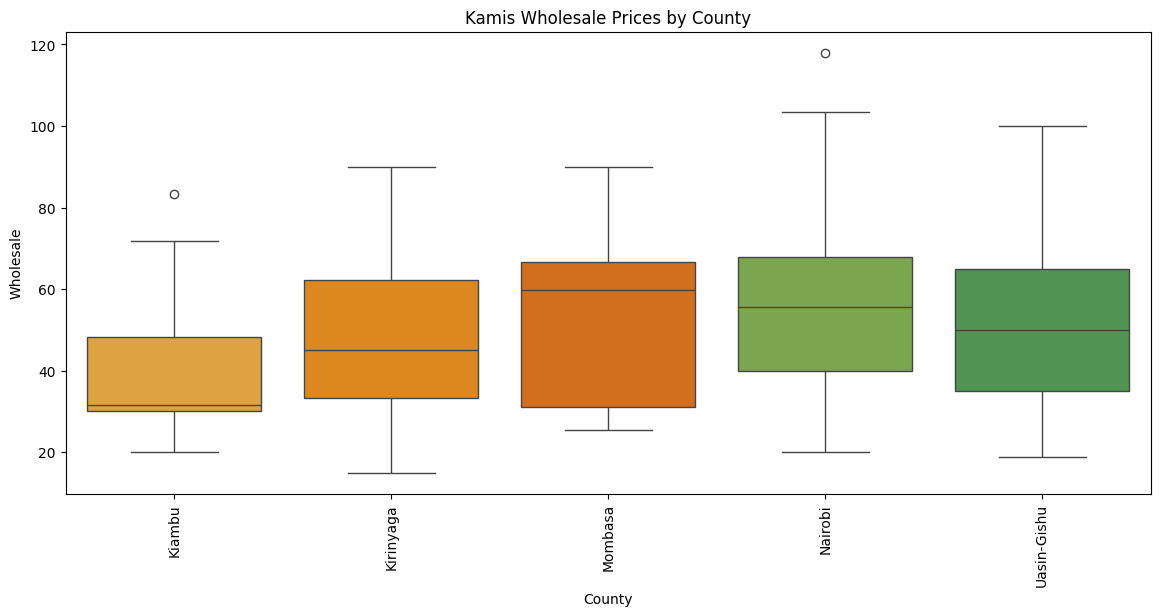

In [ ]:
plt.figure(figsize=(14,6))
sns.boxplot(
    data=kamis_df,
    x='County',
    y='Wholesale',
    palette=agriBORA_colors_list
)
plt.xticks(rotation=90)
plt.title('Kamis Wholesale Prices by County')
plt.show()


Kiangu records the lowest maize prices, followed by Kirinyanga, Mombasa, Nairobi, and Uasin-Gishu, which has the highest prices. Additionally, Nairobi displays a higher concentration of upper-end outliers, suggesting occasional price spikes relative to the other markets.

/tmp/ipython-input-1095046561.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipython-input-1095046561.py:2: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  sns.boxplot(


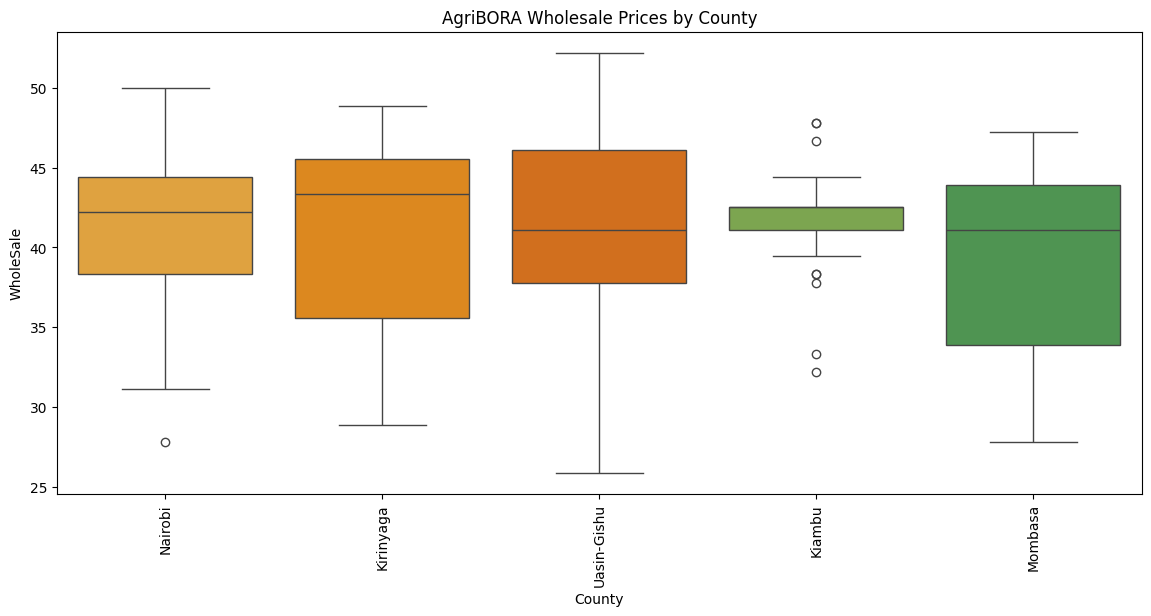

In [ ]:
plt.figure(figsize=(14,6))
sns.boxplot(
    data=agri_df,
    x='County',
    y='WholeSale',
    palette=agriBORA_colors_list
)
plt.xticks(rotation=90)
plt.title('AgriBORA Wholesale Prices by County')
plt.show()


Across counties, AgriBora wholesale prices are relatively stable in Kiambu, showing minimal variation, whereas Uasin-Gishu demonstrates the highest level of price dispersion, indicating greater volatility in that market.

**Average prices per year**

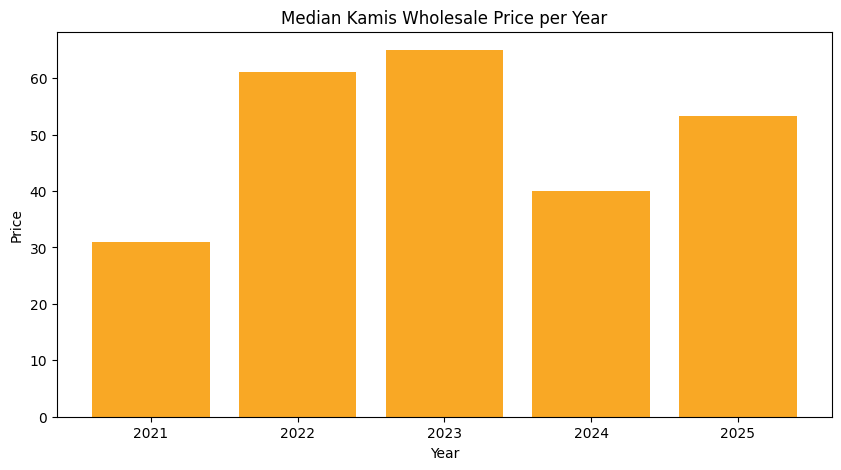

In [ ]:
# Kamis
kamis_year_avg = kamis_df.groupby('Year')['Wholesale'].median()
plt.figure(figsize=(10,5))
plt.bar(kamis_year_avg.index, kamis_year_avg.values, color=agriBORA_colors_list[0])
plt.title('Median Kamis Wholesale Price per Year')
plt.ylabel('Price')
plt.xlabel('Year')
plt.show()


Kamis wholesale prices exhibited an upward trend from 2021 through 2023, before experiencing a notable decline in 2024, potentially reflecting improved supply conditions. Although prices show a recovery in 2025, they remain below the highs recorded in 2022 and 2023

**Prices per Market**

/tmp/ipython-input-3749507411.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=kamis_df, x='Market', y='Wholesale', palette=agriBORA_colors_list)
/tmp/ipython-input-3749507411.py:3: UserWarning: 
The palette list has fewer values (6) than needed (25) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(data=kamis_df, x='Market', y='Wholesale', palette=agriBORA_colors_list)


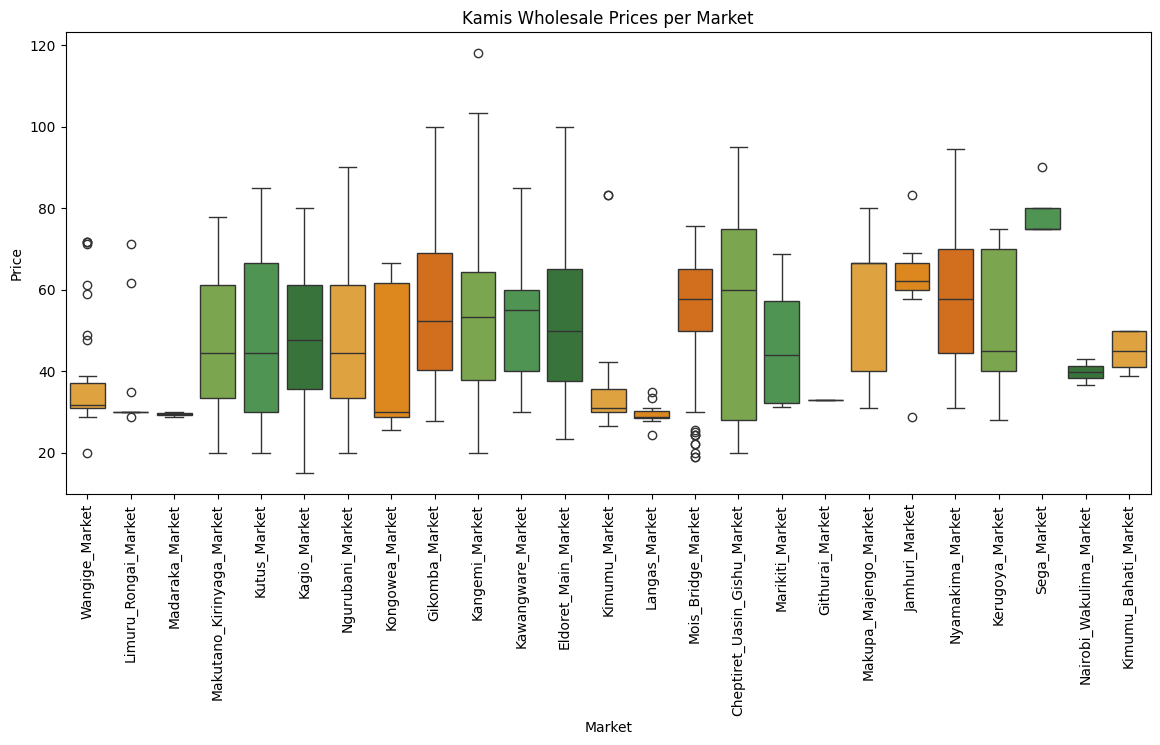

In [ ]:
# Kamis prices per market
plt.figure(figsize=(14,6))
sns.boxplot(data=kamis_df, x='Market', y='Wholesale', palette=agriBORA_colors_list)
plt.xticks(rotation=90)
plt.title('Kamis Wholesale Prices per Market')
plt.ylabel('Price')
plt.show()

**Usual Supply Volume per Month**

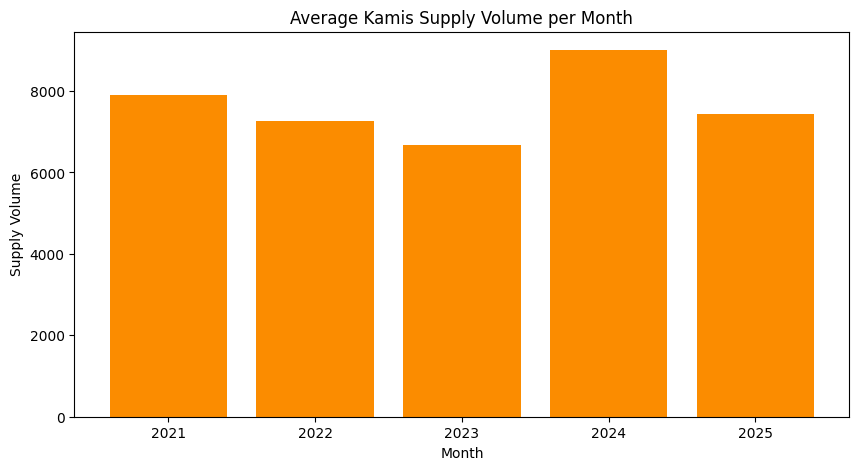

In [ ]:
# Kamis: average supply volume per month
kamis_month_avg = kamis_df.groupby('Year')['SupplyVolume'].mean()
plt.figure(figsize=(10,5))
plt.bar(kamis_month_avg.index, kamis_month_avg.values, color=agriBORA_colors_list[1])
plt.title('Average Kamis Supply Volume per Month')
plt.xlabel('Month')
plt.ylabel('Supply Volume')
plt.show()


Supply volumes reached their highest levels in 2024, coinciding with the lowest wholesale prices, while 2023 recorded the lowest supply volumes alongside the highest prices. This observation indicates a likely negative relationship between supply volume and wholesale prices in the market, consistent with basic supply–demand dynamics.

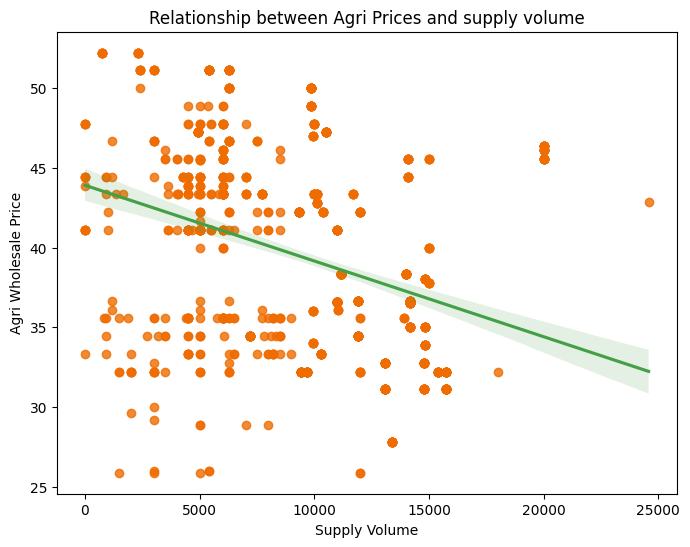

In [ ]:
# Scatter plot with regression line
plt.figure(figsize=(8,6))
sns.regplot(
    data=overlap,
    y='Agri_WholeSale',         # Agri price
    x='Supply_Volume',
    color=agriBORA_colors_list[2],
    line_kws={'color': agriBORA_colors_list[4]}  # regression line color
)
plt.title('Relationship between Agri Prices and supply volume')
plt.xlabel('Supply Volume')
plt.ylabel('Agri Wholesale Price')
plt.show()

In [ ]:
corr = overlap['Agri_WholeSale'].corr(overlap['Supply_Volume'])
print(f"Pearson correlation between Agri prices and supply volume: {corr:.2f}")

Pearson correlation between Agri prices and supply volume: -0.35


The analysis reveals a negative association between supply volume and AgriBora prices. However, the strength of this relationship is modest, as indicated by a Pearson correlation coefficient of -0.35, suggesting that supply explains only part of the price variation.

**Relation between Kamis prices and agriBORA prices**

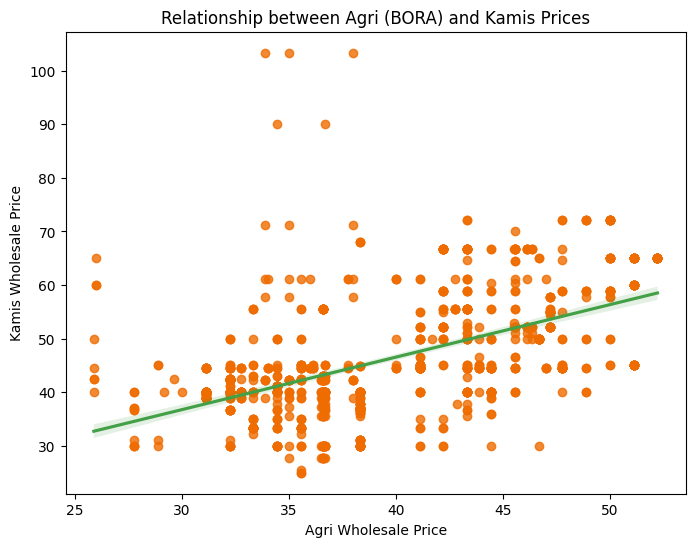

In [ ]:
# Scatter plot with regression line
plt.figure(figsize=(8,6))
sns.regplot(
    data=overlap,
    x='Agri_WholeSale',         # Agri price
    y='Kamis_WholeSale',   # Kamis price
    color=agriBORA_colors_list[2],
    line_kws={'color': agriBORA_colors_list[4]}  # regression line color
)
plt.title('Relationship between Agri (BORA) and Kamis Prices')
plt.xlabel('Agri Wholesale Price')
plt.ylabel('Kamis Wholesale Price')
plt.show()

In [ ]:
corr = overlap['Agri_WholeSale'].corr(overlap['Kamis_WholeSale'])
print(f"Pearson correlation between Agri and Kamis prices: {corr:.2f}")

Pearson correlation between Agri and Kamis prices: 0.54


A Pearson correlation coefficient of 0.54 reflects a moderate positive association between Agri and Kamis prices. While the two markets generally move in the same direction, the relationship is not strong enough to imply close co-movement or direct predictability. This means that although there is some alignment in price trends, other market-specific factors likely influence each price series independently.

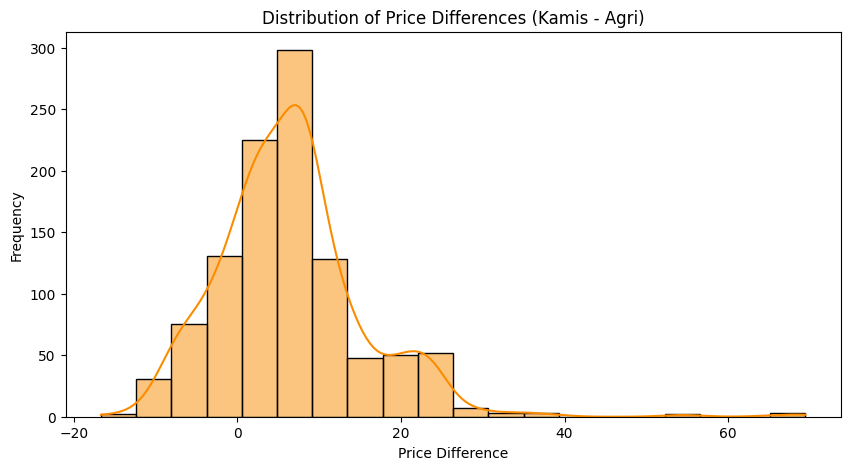

In [ ]:

overlap['price_diff'] = overlap['Kamis_WholeSale'] - overlap['Agri_WholeSale']

plt.figure(figsize=(10,5))
sns.histplot(overlap['price_diff'], bins=20, color=agriBORA_colors_list[1], kde=True)
plt.title('Distribution of Price Differences (Kamis - Agri)')
plt.xlabel('Price Difference')
plt.ylabel('Frequency')
plt.show()


The distribution of the price differences between Agri and Kamis prices approximates a normal distribution, suggesting that deviations from the mean spread are symmetrically distributed around the average difference